# Feedforward Networks


Feedforward networks (FFNs) are neural networks that allow information flow in one direction. They take in a set of features $X$ and output a set of values equal to the number of units in the FFN. 

Single layer FFNs they often act as linear projections, changing from one size dimension space to a different size dimension space, similarly they are almost always used in the final output layer of more complex networks to move from the model's dimension size to the number of classification targets.

Because FFNs only take in one set of features, they aren't frequently used by themselves for tasks that require temporal or spatial understanding: sequences of words, images, or audio are usually better handled by other models.

That said, for instances where order doesn't matter (that much), they can still be useful tools.

![Overview of FFN](./images/FFN.png)

Here we have an example FFN applied to an input tensor. You can think of FFNs as a way to do a linear projection, in our case it projects from a size $H=4$ dimensional space into a size $H=2$ dimensional space, our batch size $N$ and any other dimensions (we just write them here as $O$) are unaffected. The linear projection will learn how to convert the factors from one dimensional space (our input space) to this new output space, and when combined with a **non-linear activation function**, such as the **Rectified Linear Unit (ReLU)** or **tanh** (the hyperbolic tangent function), this is enough to solve many complex non-linearly separable problems.

# FFNs in detail

## Linear Layers

The core part of our network is the linear projection layer. This layer has a series of weights, that can get updated during neural net training, to learn aspects of the problem. Different layers in a neural network might learn different aspects of a problem. Let's look at how to make one in PyTorch: 

In [1]:
import torch, torchtext
from torch import nn, Tensor

C:\Users\prsul\anaconda3\envs\pytorch\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:

print("FFN input/output dimensions:[N,H] --> N (Batch), H (Hidden Dimension)")
input_dimensions = 4
output_dimensions = 2
example_FFN = nn.Linear(input_dimensions,output_dimensions)
x = torch.randn(2,4)

print("Input tensor has shape: {}".format(x.shape))
print(x)
out = example_FFN(x)
print("Output tensor has shape: {}".format(out.shape))
print(out)

print("The actual linear layer weights looks like this:")
print(example_FFN.weight)
print("With additional bias weights:")
print(example_FFN.bias)

FFN input/output dimensions:[N,H] --> N (Batch), H (Hidden Dimension)
Input tensor has shape: torch.Size([2, 4])
tensor([[-1.2677, -0.1342,  1.4552, -0.5371],
        [-0.3792, -0.9214,  0.1160,  1.0337]])
Output tensor has shape: torch.Size([2, 2])
tensor([[-0.7166,  0.2390],
        [ 0.1111,  0.3040]], grad_fn=<AddmmBackward0>)
The actual linear layer weights looks like this:
Parameter containing:
tensor([[-0.2289, -0.1716, -0.3955,  0.2332],
        [-0.0344,  0.0835, -0.0543,  0.0564]], requires_grad=True)
With additional bias weights:
Parameter containing:
tensor([-0.3290,  0.3159], requires_grad=True)


Let's break this down a little more! 

- Our FFN takes a tensor of size $2 \times 4$ and converts it into a $2 \times 2$ tensor. 
- `grad_fn=<AddmmBackward0>` on the output tensor indicates gradient tracking, this is how Pytorch optimizers will apply backpropagation.
- The FFN is made up of two components
 - A weight tensor that will be of size $inputdim \times outputdim$ (in our case $4 \times 2$)
 - A bias, one value for each output dimension.
- The weights and values of each tensor are generally what are called floating point (think of them like decimal) numbers.

## Non-Linear Activations

A linear layer itself isn't enough to solve non-linearly separable problems (an important class of interesting machine learning problems), this means we need to add some sort of transformation function to enable it to act 'non-linearly', the easy way to do this is through the addition of a non-linear activation function. There are many of these functions,  and they have different properties. Let's take a look at a few:

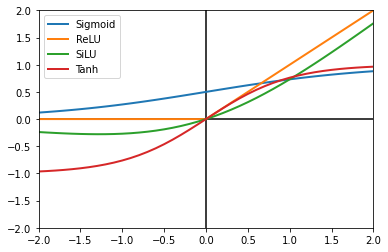

In [30]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-5,5,0.1)  # out timesteps

x_tensor = torch.from_numpy(x)
activation_functions = [nn.Sigmoid(),nn.ReLU(),nn.SiLU(),nn.Tanh()]

fig, ax = plt.subplots()
plt.axhline(0, color="black" )
plt.axvline(0, color="black")
ax.set(xlim=(-2, 2), ylim=(-2, 2))  
for activation in activation_functions:
    y = np.array(activation(x_tensor))
    ax.plot(x, y, linewidth=2, label=type(activation).__name__)

ax.legend()
plt.show()

Each of these is slightly different in terms of how it deals with inputs, with the simple similarity that none of them are straight lines (linear functions). ReLU is the easiest to explore in that it is just the identity function for positive input values and 0 otherwise. It is also a common choice due to it's reasonably strong performance. Choice of non-linearity, might depend on the particular task, but strong contenders are ReLU and the newer SiLU (aka Swish). Let's look at how the impact tensors:

In [31]:

activation_functions = [nn.Sigmoid(),nn.ReLU(),nn.SiLU(),nn.Tanh()]

for activation in activation_functions:
    print("Activation function {}".format(type(activation).__name__))
    x = torch.randn(2,4)
    print("Tensor before:")
    print(x)
    out = activation(x)
    print("Tensor after")
    print(out)

Activation function Sigmoid
Tensor before:
tensor([[ 2.0604, -0.4268,  0.3757, -0.2909],
        [-1.9359, -2.1871,  1.2916, -0.5790]])
Tensor after
tensor([[0.8870, 0.3949, 0.5928, 0.4278],
        [0.1261, 0.1009, 0.7844, 0.3592]])
Activation function ReLU
Tensor before:
tensor([[ 0.7254,  1.0108, -0.7815,  1.4718],
        [ 0.6399, -1.8693, -0.7016,  1.1181]])
Tensor after
tensor([[0.7254, 1.0108, 0.0000, 1.4718],
        [0.6399, 0.0000, 0.0000, 1.1181]])
Activation function SiLU
Tensor before:
tensor([[ 1.8504,  0.5348,  0.6886,  0.7341],
        [ 1.5967,  0.9234, -0.3432,  0.5715]])
Tensor after
tensor([[ 1.5991,  0.3372,  0.4584,  0.4960],
        [ 1.3278,  0.6609, -0.1424,  0.3652]])
Activation function Tanh
Tensor before:
tensor([[ 0.5977, -1.5785,  0.4751, -0.9990],
        [ 0.3591, -0.6177, -0.2159, -0.8487]])
Tensor after
tensor([[ 0.5354, -0.9184,  0.4423, -0.7612],
        [ 0.3444, -0.5495, -0.2126, -0.6904]])


Some observations:
- Sigmoid will always have positive outputs, with things pushed either towards 0 or 1 (though never reaching either of these values)
- ReLU will just set negative values to 0 (so simple!)
- SiLU will quash large negative values to 0, but small negative values will be only slightly squished.
- Tanh is similar to Sigmoid, but shifted to allow for negative values between -1 and 1 (instead of 0 and 1).

## Dropout

For machine learning, an important factor in training models is ensuring that you don't overfit to training data. One particular trick used to promote this in deep learning is the use of something called Dropout. Dropout is simple, it simply sets certain values randomly to 0, so that when applied through a layer, the network does not become too reliant on only certain nodes in the network to learn particular aspects of the problem. This allows for more robust training, and is standard practice in most deep learning models. During evaluation time of the module, this is turned off, allowing for the model to predict at it's best without the handicap.

Let's take a look at it:

In [61]:
x = torch.randn(2,4)
dropout = nn.Dropout(p=.5)
print("Before dropout")
print(x)
out = dropout(x)
print("after dropout")
print(out)

Before dropout
tensor([[ 1.1721,  0.0143,  1.7336, -0.2075],
        [-0.5045, -1.1490, -2.0957,  0.0676]])
after dropout
tensor([[ 0.0000,  0.0000,  3.4672, -0.4149],
        [-1.0089, -0.0000, -0.0000,  0.1352]])


Let's look at a simple combination of these layers so far. Here we package them into a pytorch style module 'class' which allows for the weights to be 'remembered' during training, and to be updated as we go. The forward function here defines how we pass data through the model, in our case we simply pass it one after another through our components.

In [38]:
class SimpleDropoutModule(nn.Module):
    def __init__(self):
        super(SimpleDropoutModule, self).__init__()
        self.layer = nn.Linear(4,2)   
        self.activation = nn.Tanh()
        self.dropout= nn.Dropout(p=.5) 
    
    def forward(self, x):    # out 'foward' pass
        x = self.layer(x)
        x = self.activation(x)
        x = self.dropout(x)
        return x

In [39]:
x = torch.randn(2,4)
example_model = SimpleDropoutModule()
print("Input")
print(x)
out = example_model(x)
print("Output")
print(out)

example_model.eval()
print("Input through 'eval' version of model")
print(x)
out = example_model(x)
print("Output through 'eval' version of model")
print(out)

Input
tensor([[ 1.3736, -1.8769,  0.6300, -1.1968],
        [-1.7959, -1.9363,  0.9578, -0.3817]])
Output
tensor([[ 0.0000, -0.0000],
        [ 0.0000, -1.8407]], grad_fn=<MulBackward0>)
Input through 'eval' version of model
tensor([[ 1.3736, -1.8769,  0.6300, -1.1968],
        [-1.7959, -1.9363,  0.9578, -0.3817]])
Output through 'eval' version of model
tensor([[ 0.6283, -0.4625],
        [ 0.5964, -0.9204]], grad_fn=<TanhBackward0>)


Here we can see how 'eval' will turn off the dropout layer.

## Softmax

Finally we often want to get the outputs of our model in a probability distribution, we do this using the Softmax function, which simply normalizes the outputs so that they add up to 1. This can then be used with a loss function that will determine how far our normalized predictions were from the ultimate answer. The dimension in the softmax should usually correspond to your hidden or embedding dimension (usually the last dimension in your tensor, which corresponds to giving -1 to the dimension argument)

In [40]:
softmax = nn.Softmax(dim=-1)

x = torch.randn(2,4)
print("Before softmax")
print(x)
out = softmax(x)
print("After softmax")
print(out)

Before softmax
tensor([[-0.0405,  0.3267,  0.8583,  0.6062],
        [-0.2797,  1.2577,  0.7598, -0.3954]])
After softmax
tensor([[0.1469, 0.2120, 0.3608, 0.2804],
        [0.1067, 0.4965, 0.3018, 0.0951]])


Here we can just verify that the rows (our H dimension) add up to 1.

# Classification Task: Sentiment Analysis

Let's put our knowledge into practice through a simple sentiment classification task. Each sentence in our tasks (from the Stanford Sentiment Treebank) corresponds to either a positive or a negative sentence (e.g. "That was great" (pos) vs. "The worst thing ever" (neg)).

Because FFNs are not great at dealing with sequence components, that is to say the order of words, we'll employ an EmbeddingBag to get a single representation of all the words in the sentence. Our EmbeddingBag just maps each token to a learnable vector, and then sums all the resulting vectors in the sentence together to summarize the entire sentence. This means we can ignore the sentence order in our problem (we'll look at tools that better deal with order later).

First let's grab our corpus and some helpful tools from the torchtext library.

In [41]:

from torchtext.datasets import SST2
from torchtext.vocab import build_vocab_from_iterator
from torchtext.data.utils import get_tokenizer
from torch.utils.data import dataset

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [42]:
SST2_train = SST2(split="train") 
SST2_dev = SST2(split="dev")

Since we'll need to know what words map to what tokenIDs (the numeric representation of our input) we'll build a vocabulary from our corpus, the vocab here is really just this mapping.

In [43]:
tokenizer = get_tokenizer('basic_english')
vocab = build_vocab_from_iterator(map(lambda x: tokenizer(x[0]), SST2_train), max_tokens=10000, specials=['<unk>','<pad>'])
vocab.set_default_index(vocab['<unk>'])

In [44]:
len(vocab)

10000

In [45]:
vocab.lookup_indices(["<pad>","<unk>"])

[1, 0]

Next we need to tokenize our text, that is break it into individual units. Each tokenizer is a little bit different, some will simply break each word into their own token (a 'whitespace' tokenizer), while others will handle contractions differently ("won't" might be broken into "won" and "'t" or something similar). Fancier tokenizers might learn how to tokenize things best from statistical modeling of the corpus, one common tool that does this is the SentencePiece tokenizer, but for now we'll just use a simple one.

In [47]:
from typing import List, Optional, Any, Union

class default_tokenizer(nn.Module):
    def __init__(self, tokenizer):
        super().__init__()
        self.tokenizer = tokenizer

    def forward(self, input: Any) -> Any:
        if torch.jit.isinstance(input, List[str]):
            tokens: List[List[str]] = []
            for text in input:
                tokens.append(self.tokenizer(text))
            return tokens
        elif torch.jit.isinstance(input, str):
            return self.tokenizer(input)
        else:
            raise TypeError("Input type not supported")

To apply it and turn our raw vocab into ids we'll put it into a transform sequence.

In [48]:
import torchtext.transforms as T

processor = T.Sequential(
    default_tokenizer(tokenizer),
    T.VocabTransform(vocab),
    )



Now we apply this to our dataset and create dataloaders, which will be able to shuffle our data into sets of batches (this way we can train on more than one sample at a time).

In [49]:
from torch.utils.data import DataLoader
from torch.nn.utils.rnn import pad_sequence

def collate_batch(batch):
    label_list, text_list = [], []
    for (_text, _label) in batch:
        label_list.append(_label)
        processed_text = torch.tensor(processor(_text))
        text_list.append(processed_text)
    return torch.tensor(label_list), pad_sequence(text_list, padding_value=vocab.__getitem__("<pad>"))


train_loader = DataLoader(list(SST2_train), batch_size=64, shuffle=True, 
                              collate_fn=collate_batch)
dev_loader = DataLoader(list(SST2_dev), batch_size=64, shuffle=False, 
                              collate_fn=collate_batch)

In [50]:
for i in train_loader:
    print(i)
    break

    
    

(tensor([0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
        0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1]), tensor([[  71,  999, 2941,  ...,   67,    3, 2032],
        [  59, 4064,   54,  ...,   13,    2,   13],
        [1076,   14,    0,  ...,    2,   18,   73],
        ...,
        [  41,    1,    1,  ...,    1,    1,    1],
        [  22,    1,    1,  ...,    1,    1,    1],
        [   7,    1,    1,  ...,    1,    1,    1]]))


All those 1s in the lower rows are our padded sentences. 

Let's define a training loop and evaluation loop. In the first, we will pass a batch of our dataset to our model, create predictions from the batch and then see how closely they matched the targets. From this we'll generate a **loss** which can be used by our **optimizer** to shift the weights in our model in a direction that will cause it to guess better next time.

Our evaluation loop simply passes the dataloaders in to generate predictions and calculate the accuracy of those predictions.

In [51]:
from sklearn.metrics import accuracy_score 

def train(loader, model, criterion, optimizer, device):
    total_loss = 0.0
    num_sample = 0
    for batch in loader:
        # load the current batch
        batch_output, batch_input = batch

        batch_input = batch_input.to(device)
        batch_output = batch_output.to(device)
        # forward propagation
        # pass the data through the model
        model_outputs = model(batch_input)
        # compute the loss
        cur_loss = criterion(model_outputs, batch_output)
        total_loss += cur_loss.item()

        # backward propagation (compute the gradients and update the model)
        # clear the buffer
        optimizer.zero_grad()
        # compute the gradients
        cur_loss.backward()
        # update the weights
        optimizer.step()
        num_sample += batch_output.shape[0]
    return total_loss / num_sample


# evaluation logic based on classification accuracy
def evaluate(loader, model, device):
    all_pred = []
    all_label = []
    with torch.no_grad():
        for batch in loader:
            # load the current batch
            batch_output, batch_input = batch


            batch_input = batch_input.to(device)
            # forward propagation
            # pass the data through the model
            model_outputs = model(batch_input)
            # identify the predicted class for each example in the batch
            probabilities, predicted = torch.max(model_outputs.cpu().data, 1)
            # put all the true labels and predictions to two lists
            all_pred.extend(predicted)
            all_label.extend(batch_output)

    accuracy = accuracy_score(all_label, all_pred)
    return accuracy


Next let's build our actual model. This time we've fleshed it out considerably from our earlier example, but fundamentally it's the same. A linear layer followed by a nonlinearity and then dropout. This time we do have an EmbeddingBag, which again compresses our input sentence into a summarized representation, and we added an output layer with softmax.

In [52]:
class FFN(nn.Module):
    def __init__(self, output_size, layers, linear_units, vocab_size, embedding_size, dropout):
        super(FFN, self).__init__()
        
        self.layers = nn.ModuleList()  # Keep track of our layers
        self.nonlinear = nn.ReLU()     # Non-linear activation 
        self.dropout = nn.Dropout(p=dropout)     #  Dropout helps the network generalize to unseen data
        self.layers.append(nn.EmbeddingBag(vocab_size, embedding_size, padding_idx=vocab.__getitem__("<pad>")))   # Convert input text into a pooled vector
        self.layers.append(nn.Linear(embedding_size, linear_units))   # The first of our Feedforward layers
        self.layers.append(self.nonlinear)
        for layer in range(layers):    # For each layer, add a Linear, nonlinear activation, and dropout.
            self.layers.append(nn.Linear(linear_units,linear_units))
            self.layers.append(self.nonlinear)
            self.layers.append(self.dropout)
        self.layers.append(nn.Linear(linear_units,output_size))   # on the final layer, project to size of classes
        self.layers.append(nn.Softmax(dim=-1))   # Softmax normalizes vectors so they can represent probabilities
    
    def forward(self, x):    # out 'foward' pass, since we put everything into a ModuleList, we just iterate it.
        x = x.permute(1,0)
        for layer in self.layers:
            x = layer(x)
        return x

We can define these things now. Last two things are our optimizer, which we'll use the Stochastic Gradient Descent algorithm, and our loss function, Cross Entropy

In [56]:
model = FFN(2, 3, 128, len(vocab), 128, .3)
model.to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01,momentum=.9)
criteria = nn.CrossEntropyLoss()
max_epochs = 30


In [57]:

results = {"epoch": [], "loss" : [], "train acc" : [], "val acc" :[]}
for i in range(max_epochs):
    loss = train(train_loader, model, criteria, optimizer, device)
    train_acc = evaluate(train_loader, model, device)
    val_acc = evaluate(dev_loader, model, device)
    results["epoch"].append(i)
    results["loss"].append(loss)
    results['train acc'].append(train_acc)
    results['val acc'].append(val_acc)
    
    print("Epoch {} results: Loss {}, Train Acc: {}, Val Acc: {}".format(i+1, loss, train_acc, val_acc))


Epoch 1 results: Loss 0.010734199214688576, Train Acc: 0.5578256544269403, Val Acc: 0.5091743119266054
Epoch 2 results: Loss 0.010690897656707669, Train Acc: 0.565398149935411, Val Acc: 0.5493119266055045
Epoch 3 results: Loss 0.01038943259890806, Train Acc: 0.6304622191866249, Val Acc: 0.5997706422018348
Epoch 4 results: Loss 0.010019220963029082, Train Acc: 0.6739817963147189, Val Acc: 0.6123853211009175
Epoch 5 results: Loss 0.009521359265780764, Train Acc: 0.7214657975619534, Val Acc: 0.6238532110091743
Epoch 6 results: Loss 0.008980712261257866, Train Acc: 0.7445990289388112, Val Acc: 0.6261467889908257
Epoch 7 results: Loss 0.008581478121650641, Train Acc: 0.7729290709587373, Val Acc: 0.6204128440366973
Epoch 8 results: Loss 0.008286120340686738, Train Acc: 0.7809767034402887, Val Acc: 0.6353211009174312
Epoch 9 results: Loss 0.00805090936436101, Train Acc: 0.8092028092473533, Val Acc: 0.643348623853211
Epoch 10 results: Loss 0.007855700091403475, Train Acc: 0.821927571307666, Va

In [58]:
import matplotlib.pyplot as plt
import numpy as np

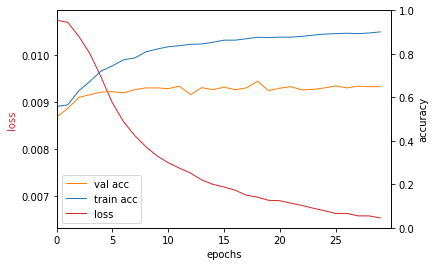

In [60]:
fig, ax1 = plt.subplots()

color = 'tab:red'
loss_line, = ax1.plot(results["epoch"],results["loss"], linewidth=1.0, color=color, label= "loss")
ax1.set(xlim=(0, 30), xticks=np.arange(0, 30,5))                               
ax1.set_ylabel('loss', color=color)                             
ax1.set_xlabel('epochs')
ax2 = ax1.twinx()


train_line, = ax2.plot(results["epoch"],results["train acc"], linewidth=1.0, label='train acc')
val_line, = ax2.plot(results["epoch"],results["val acc"], linewidth=1.0, label='val acc')
ax2.set(xlim=(0, 30), xticks=np.arange(0, 30,5),
       ylim=(0, 1))
ax2.set_ylabel('accuracy')

p = [val_line, train_line, loss_line]
ax2.legend(p, [p_.get_label() for p_ in p])

plt.show()